In [242]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

In [243]:
in_file_name = 'data/grouped_paces_ju.tsv'
df_all = pd.read_csv(in_file_name, delimiter="\t")

In [244]:
df = df_all[np.isfinite(df_all.pace_2)]
#df = df_all

In [245]:
df = df.assign(logp_1=pd.Series(np.log(df.pace_1)).values)
df = df.assign(logp_2=pd.Series(np.log(df.pace_2)).values)
df = df.assign(logp_3=pd.Series(np.log(df.pace_3)).values)
df = df.assign(logp_4=pd.Series(np.log(df.pace_4)).values)
df = df.assign(logp_5=pd.Series(np.log(df.pace_5)).values)
df = df.assign(logp_6=pd.Series(np.log(df.pace_6)).values)

In [246]:
logs = df.as_matrix(["logp_2", "logp_3", "logp_4", "logp_5", "logp_6"])
logs
means = np.nanmean(logs, axis=1)
stdevs = np.nanstd(logs, axis=1)
df = df.assign(log_means=pd.Series(means).values)
df = df.assign(log_stdevs=pd.Series(stdevs).values)

In [247]:
# s = sigma and scale = exp(mu).
intervals95 = lognorm.interval(0.95, s = df["log_stdevs"], scale = np.exp(df["log_means"]))
means = lognorm.mean(s = df["log_stdevs"], scale = np.exp(df["log_means"]))
medians = lognorm.median(s = df["log_stdevs"], scale = np.exp(df["log_means"]))

In [248]:

df = df.assign(interval95_start = pd.Series( intervals95[0] ).values)
df = df.assign(interval95_end = pd.Series( intervals95[1] ).values)
df = df.assign(p1_in_interval = pd.Series( (df.interval95_start <= df.pace_1) & (df.interval95_end >= df.pace_1) ).values)
df = df.assign(mean_ln = pd.Series(means).values)
df = df.assign(med_ln = pd.Series(medians).values)


In [249]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
mean_err = rmse(df.mean_ln, df.pace_1)
med_err = rmse(df.med_ln, df.pace_1)
(mean_err, med_err)

(1.5159537791332587, 1.4932210832773298)

In [250]:
np.mean(df.p1_in_interval)

0.556515821708064

In [262]:
runner = df[df['name'].str.contains("freeman")==True]

In [264]:
runner.log_stdevs

3372    0.104116
Name: log_stdevs, dtype: float64

In [267]:
x = np.linspace(5, 20, 100)
y = lognorm.pdf(x, s= runner.log_stdevs, scale=np.exp(runner.log_means))

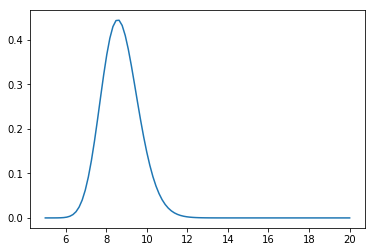

In [268]:
plt.plot(x, y)

In [254]:
plott

,teams,name,num_runs,num_valid_times,mean_pace,stdev,pace_1,pace_2,pace_3,pace_4,...,logp_4,logp_5,logp_6,log_means,log_stdevs,interval95_start,interval95_end,p1_in_interval,mean_ln,med_ln
0,BROMMA-VÄLLINGBY SOK/JÄRFÄL;IFK GÖTEBORG,max peter bejmer,3,3,6.337,1.050,5.582,5.608,7.822,NaN,...,NaN,NaN,NaN,1.890567,0.166373,4.780198,9.176560,True,6.715426,6.623124
1,MARKBYGDENS OK;IFK GÖTEBORG,johan högstrand,4,4,6.198,0.468,5.591,5.902,6.571,6.728,...,1.906278,NaN,NaN,1.854745,0.057003,5.714579,7.145405,False,6.400459,6.390069
2,IFK GÖTEBORG,vetle ruud bråten,4,4,5.750,0.181,5.688,5.636,5.615,6.060,...,1.801710,NaN,NaN,1.752109,0.035106,5.383299,6.177514,True,5.770305,5.766750
3,IFK GÖTEBORG,jonas pilblad,5,5,6.083,0.389,5.978,5.772,6.819,5.756,...,1.750243,1.806484,NaN,1.807365,0.068628,5.327360,6.971798,True,6.108733,6.094365
6,IFK GÖTEBORG,eskil kinneberg,4,4,5.623,0.084,5.611,5.494,5.719,5.668,...,1.734836,NaN,NaN,1.727429,0.017203,5.439636,5.819101,True,5.627003,5.626170
7,KOOVEE,topi anjala,6,6,6.080,0.516,5.621,6.100,5.977,7.164,...,1.969068,1.730239,1.787417,1.816586,0.080558,5.252450,7.202858,True,6.170816,6.150825
9,KOOVEE;VAAJAKOSKEN TERÄ,jani lakanen,6,6,6.044,0.456,5.874,5.734,6.208,6.717,...,1.904642,1.672600,1.856767,1.801252,0.082382,5.154065,7.118654,True,6.077817,6.057227
10,HIIDENKIERTÄJÄT;KOOVEE;DELTA,lauri sild,6,6,5.950,0.410,5.851,5.996,5.829,6.765,...,1.911762,1.684731,1.769173,1.783921,0.073342,5.156063,6.873465,True,5.969185,5.953152
11,KANGASALA SK;KOOVEE,kenny kivikas,6,4,6.019,0.337,5.662,5.837,6.014,6.562,...,1.881295,NaN,NaN,1.813201,0.049671,5.561391,6.756828,True,6.137604,6.130037
12,HIIDENKIERTÄJÄT;KOOVEE;DELTA,timo sild,6,6,5.648,0.359,5.272,5.850,5.378,6.293,...,1.839438,1.676349,1.748852,1.742679,0.060014,5.078694,6.425694,True,5.722926,5.712629


([array([5.900e+01, 4.170e+02, 6.710e+02, 9.440e+02, 1.181e+03, 1.385e+03,
         1.370e+03, 1.178e+03, 8.950e+02, 6.400e+02, 4.300e+02, 3.160e+02,
         2.010e+02, 1.250e+02, 8.200e+01, 5.400e+01, 4.100e+01, 3.200e+01,
         2.300e+01, 1.500e+01, 2.000e+01, 7.000e+00, 4.000e+00, 1.000e+00,
         3.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
  array([1.620e+02, 5.010e+02, 6.750e+02, 9.600e+02, 1.290e+03, 1.300e+03,
         1.319e+03, 1.067e+03, 7.770e+02, 5.750e+02, 4.250e+02, 2.970e+02,
         1.840e+02, 1.650e+02, 9.500e+01, 6.700e+01, 5.600e+01, 5.400e+01,
         2.800e+01, 2.300e+01, 1.600e+01, 2.100e+01, 1.200e+01, 4.000e+00,
         8.000e+00, 1.000e+01, 2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00,
         2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.0

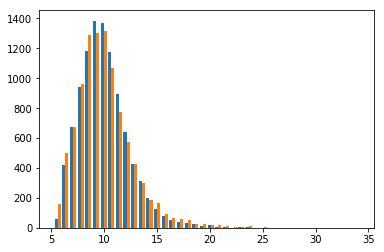

In [255]:
plt.hist([plott.med_ln, plott.pace_1], bins = 40, label = ["estimate", "2017"])

### 